# Data Visualization for Master Thesis

Introduction

## Import Resources

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization

### Vis 1

In [115]:
# Create paths for HCC

for exp in range(1, 4):
    exec(f"path_1_{exp} = '/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_{exp}.csv'")

# path_1_1
# path_1_1 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_1.csv"
# path_1_2 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_2.csv"
# path_1_3 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_3.csv"

In [113]:
# Create paths for ILPD

for exp in range(1, 4):
    exec(f"path_1_{exp} = '/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_1_{exp}.csv'")

# path_1_1
# path_1_1 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_1.csv"
# path_1_2 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_2.csv"
# path_1_3 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_3.csv"

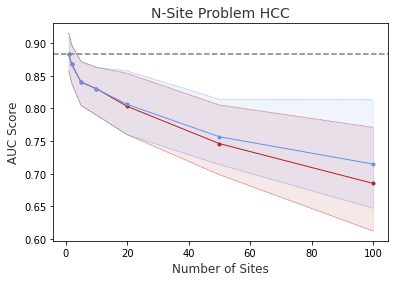

In [116]:
# Import and transform data based on specified paths. Visualize NOW!
df_1_1 = pd.read_csv(path_1_1, index_col=False)
df_1_2 = pd.read_csv(path_1_2, index_col=False)
df_1_3 = pd.read_csv(path_1_3, index_col=False)

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = '%s' % n
    return percentile_

# column.agg([np.sum, np.mean, np.std, np.median, np.var, np.min, np.max, percentile(25), percentile(75)])
#df_1_1.quantile([.25, .75])
plot_1_1 = df_1_1.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_2 = df_1_2.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_3 = df_1_3.groupby(['n', 'e', 'r']).agg([np.mean, percentile(25), percentile(75)]).reset_index()

plot_1_1.columns = ['_'.join(col) for col in plot_1_1.columns]
plot_1_2.columns = ['_'.join(col) for col in plot_1_2.columns]
plot_1_3.columns = ['_'.join(col) for col in plot_1_3.columns]

# Plot mean estimate as a line
plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="firebrick", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_2, alpha=0.1, color="firebrick")

plt.plot('n_', 'AUC Score_mean', data = plot_1_3, linewidth=1, alpha=1, color="cornflowerblue", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_3, alpha=0.1, color="cornflowerblue")

plt.axhline(y=plot_1_1.at[0, 'AUC Score_mean'], color='grey', linestyle='--')

plt.title("N-Site Problem HCC", alpha=0.8, fontsize=14)
plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

# plt.legend()
plt.show()


### Vis 2: Inter-Site Sample Size Imbalance

In [117]:
Which_experiment = 'HCC' # Prepare data for inter-site sample size imbalance experiments

path_2_2_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{Which_experiment}_2_2_unweighted.csv"
path_2_2_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{Which_experiment}_2_2_weighted.csv"
path_2_3_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{Which_experiment}_2_3_unweighted.csv"
path_2_3_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{Which_experiment}_2_3_weighted.csv"

df_2_2_u = pd.read_csv(path_2_2_u, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_2_w = pd.read_csv(path_2_2_w, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_u = pd.read_csv(path_2_3_u, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_w = pd.read_csv(path_2_3_w, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()

df_2_2_u = df_2_2_u.rename(columns={"F-1 Score": "f_1_22u", "MCC Score": "mcc_22u", "AUC Score": "auc_22u", "ACC Score": "acc_22u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_2_w = df_2_2_w.rename(columns={"F-1 Score": "f_1_22w", "MCC Score": "mcc_22w", "AUC Score": "auc_22w", "ACC Score": "acc_22w", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_u = df_2_3_u.rename(columns={"F-1 Score": "f_1_23u", "MCC Score": "mcc_23u", "AUC Score": "auc_23u", "ACC Score": "acc_23u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_w = df_2_3_w.rename(columns={"F-1 Score": "f_1_23w", "MCC Score": "mcc_23w", "AUC Score": "auc_23w", "ACC Score": "acc_23w", "Degree Imbalance": "imb"}).drop(columns=['s'])

df_2_x_x = df_2_2_u.join(df_2_2_w.set_index('imb'), on='imb').join(df_2_3_u.set_index('imb'), on='imb').join(df_2_3_w.set_index('imb'), on='imb')
#pd.merge(df_2_2_u, df_2_2_w, on="Degree Imbalance", how='inner')

In [119]:
Which_experiment = 'ILPD' # Prepare data for inter-site sample size imbalance experiments

path_2_2_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{Which_experiment}_2_2_unweighted.csv"
path_2_2_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{Which_experiment}_2_2_weighted.csv"
path_2_3_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{Which_experiment}_2_3_unweighted.csv"
path_2_3_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{Which_experiment}_2_3_weighted.csv"

df_2_2_u = pd.read_csv(path_2_2_u, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_2_w = pd.read_csv(path_2_2_w, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_u = pd.read_csv(path_2_3_u, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_w = pd.read_csv(path_2_3_w, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()

df_2_2_u = df_2_2_u.rename(columns={"F-1 Score": "f_1_22u", "MCC Score": "mcc_22u", "AUC Score": "auc_22u", "ACC Score": "acc_22u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_2_w = df_2_2_w.rename(columns={"F-1 Score": "f_1_22w", "MCC Score": "mcc_22w", "AUC Score": "auc_22w", "ACC Score": "acc_22w", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_u = df_2_3_u.rename(columns={"F-1 Score": "f_1_23u", "MCC Score": "mcc_23u", "AUC Score": "auc_23u", "ACC Score": "acc_23u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_w = df_2_3_w.rename(columns={"F-1 Score": "f_1_23w", "MCC Score": "mcc_23w", "AUC Score": "auc_23w", "ACC Score": "acc_23w", "Degree Imbalance": "imb"}).drop(columns=['s'])

df_2_x_x = df_2_2_u.join(df_2_2_w.set_index('imb'), on='imb').join(df_2_3_u.set_index('imb'), on='imb').join(df_2_3_w.set_index('imb'), on='imb')
#pd.merge(df_2_2_u, df_2_2_w, on="Degree Imbalance", how='inner')

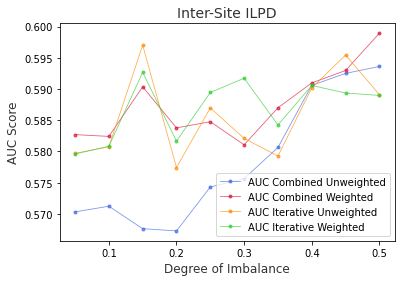

In [120]:
# And plot it

# Plot mean estimate as a line
# plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="crimson", marker='o')
plt.plot('imb', 'auc_22u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Combined Unweighted', color="royalblue", linestyle='-', marker='.')
plt.plot('imb', 'auc_22w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Combined Weighted', color="crimson", linestyle='-', marker='.')
plt.plot('imb', 'auc_23u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Unweighted', color="darkorange", linestyle='-', marker='.')
plt.plot('imb', 'auc_23w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Weighted', color="limegreen", linestyle='-', marker='.')

# plt.axhline(y=0.883067, color='grey', linestyle='--')

plt.title(f"Inter-Site {Which_experiment}", alpha=0.8, fontsize=14)
plt.xlabel("Degree of Imbalance", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.legend()
plt.show()


### Vis 3: Communication Efficiency

In [124]:
path_comm_effi = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_comm_effi.csv"

In [126]:
path_comm_effi = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_comm_effi.csv"

In [128]:
path_comm_effi = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_BRCA_comm_effi.csv"

No handles with labels found to put in legend.


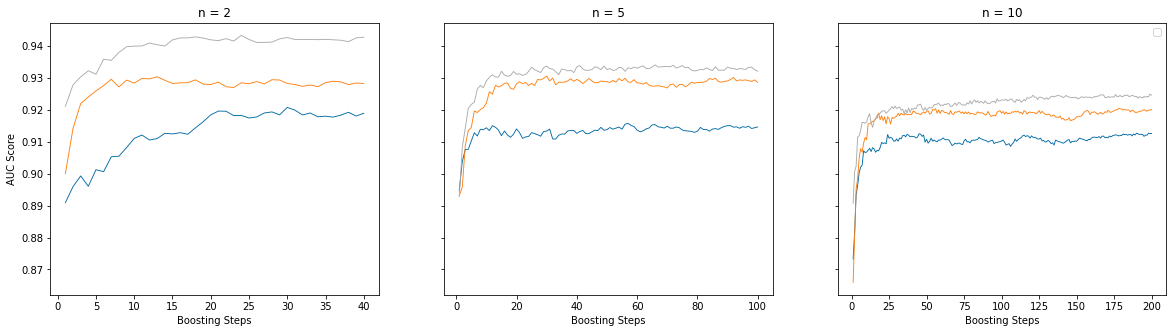

In [129]:
df = pd.read_csv(path_comm_effi, index_col=False)
df = df.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df.columns = ['_'.join(col) for col in df.columns]

plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
ax_indx = [0, 1, 2]
n_sites = [2, 5, 10]

l_rates = [1, 2, 5]
# corlors = ['']
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(20,5))

for i, n in zip(ax_indx, n_sites):
    for e in l_rates: 
        ax[i].plot(
            df[(df["n_"]==n) & (df["e_"]==e)]["v_"], 
            df[(df["n_"]==n) & (df["e_"]==e)]["auc_mean"], 
            linestyle='solid', 
            linewidth=0.9
        )
        ax[i].set_title(f'n = {n}')

plt.setp(ax[:], xlabel='Boosting Steps', alpha=0.8)
plt.setp(ax[0], ylabel='AUC Score', alpha=0.8)

# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.legend()

plt.show()

## Reference

In [ ]:
"""     plt.ioff()
        plt.figure()

        plt.plot(local_metric.number_sites,
                 local_metric["25%"], linewidth=1, alpha=0.7, color="firebrick")
        plt.plot(local_metric.number_sites,
                 local_metric["75%"], linewidth=1, alpha=0.7, color="firebrick")
        plt.plot(local_metric.number_sites,
                 local_metric["mean"], linewidth=1, alpha=1, color="firebrick")
        plt.fill_between(local_metric.number_sites, local_metric["25%"],
                         local_metric["75%"], alpha=0.3, color="firebrick")

        plt.plot(global_metric.number_sites,
                 global_metric["25%"], linewidth=1, alpha=0.7, color="cornflowerblue")
        plt.plot(global_metric.number_sites,
                 global_metric["75%"], linewidth=1, alpha=0.7, color="cornflowerblue")
        plt.plot(global_metric.number_sites,
                 global_metric["mean"], linewidth=1, alpha=1, color="cornflowerblue")
        plt.fill_between(global_metric.number_sites, global_metric["25%"],
                         global_metric["75%"], alpha=0.3, color="cornflowerblue")

        sct1 = plt.scatter(global_metric.number_sites,
                           global_metric["mean"], color="cornflowerblue", marker="o", s=20)
        sct2 = plt.scatter(local_metric.number_sites,
                           local_metric["mean"], color="firebrick", marker="o", s=20)

        title = dataset_name + " - " + method + " method, " + \
            str(int(fraction*100)) + " % of features dropped"
        plt.title(title, alpha=0.8, fontsize=14)
        plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
        plt.ylabel(metric_name, alpha=0.8, fontsize=12) """